$\bold{Task\ 4}$

In [5]:

!pip install tsfel
!pip install pandas
!pip install numpy
!pip install sci-kit learn
!pip install matplotlib
!pip install tsfel
import pandas as pd
import numpy as np
import tsfel
from itertools import product
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
from functions import *


ERROR: Could not find a version that satisfies the requirement sci-kit (from versions: none)
ERROR: No matching distribution found for sci-kit


**Loading Datasets**

The preprocessed datasets created from recorded datasets in the dataprocessing.ipynb file in the Task4-data folder. They are concatenated into a pandas dataframe with three featues

In [16]:
sub1_laying = pd.read_csv('../Task4-data/ProcessedData/Aarsh_laying_1.csv')

sub2_laying = pd.read_csv('../Task4-data/ProcessedData/Abhinav_laying_1.csv')

sub3_laying = pd.read_csv('../Task4-data/ProcessedData/Arjun_laying_1.csv')

sub4_laying = pd.read_csv('../Task4-data/ProcessedData/Hari_laying_1.csv')

sub1_sitting = pd.read_csv('../Task4-data/ProcessedData/Aarsh_Sitting_1.csv')

sub2_sitting = pd.read_csv('../Task4-data/ProcessedData/Abhinav_sitting_1.csv')

sub3_sitting = pd.read_csv('../Task4-data/ProcessedData/Arjun_sitting_1.csv')

sub4_sitting = pd.read_csv('../Task4-data/ProcessedData/Hari_Sitting_1.csv')


sub1_standing = pd.read_csv('../Task4-data/ProcessedData/Aarsh_standing_1.csv')

sub2_standing = pd.read_csv('../Task4-data/ProcessedData/Abhinav_standing_1.csv')

sub3_standing = pd.read_csv('../Task4-data/ProcessedData/Arjun_standing_1.csv')

sub4_standing = pd.read_csv('../Task4-data/ProcessedData/Hari_standing_1.csv')


sub1_walking = pd.read_csv('../Task4-data/ProcessedData/Aarsh_Walking_1.csv')

sub2_walking = pd.read_csv('../Task4-data/ProcessedData/Abhinav_walking_1.csv')

sub3_walking = pd.read_csv('../Task4-data/ProcessedData/Arjun_walking_1.csv')

sub4_walking = pd.read_csv('../Task4-data/ProcessedData/Hari_walking_1.csv')


sub1_walking_upward = pd.read_csv('../Task4-data/ProcessedData/Aarsh_Walking_Upstairs.csv')

sub2_walking_upward = pd.read_csv('../Task4-data/ProcessedData/Abhinav_Walking_Upstairs_1.csv')

sub3_walking_upward = pd.read_csv('../Task4-data/ProcessedData/Arjun_Walking_upstairs_1.csv')

sub4_walking_upward = pd.read_csv('../Task4-data/ProcessedData/Hari_Walking_upstairs_1.csv')


sub1_walking_downward = pd.read_csv('../Task4-data/ProcessedData/Aarsh_Walking_downstairs.csv')
sub2_walking_downward = pd.read_csv('../Task4-data/ProcessedData/Abhinav_Walking_Downstairs_1.csv')

sub3_walking_downward = pd.read_csv('../Task4-data/ProcessedData/Arjun_Walking_downstairs.csv')

sub4_walking_downward = pd.read_csv('../Task4-data/ProcessedData/Hari_Walking_downstairs.csv')


y_label = [6,6,6,6,4,4,4,4,5,5,5,5,1,1,1,1,3,3,3,3,2,2,2,2]

X_testing = pd.concat([sub1_laying,sub2_laying,sub3_laying,sub4_laying,sub1_sitting,sub2_sitting,sub3_sitting,sub4_sitting,sub1_standing,sub2_standing,sub3_standing,sub4_standing,sub1_walking,sub2_walking,sub3_walking,sub4_walking,sub1_walking_downward,sub2_walking_downward,sub3_walking_downward,sub4_walking_downward,sub1_walking_upward,sub2_walking_upward,sub3_walking_upward,sub4_walking_upward]).reset_index(drop=True)

X_testing

,gFx,gFy,gFz
0,0.657008,-0.314774,-0.759454
1,0.693369,-0.072888,-0.725412
2,0.568873,0.064632,-0.635860
3,0.685740,-0.259948,-0.748174
4,0.840807,-0.356107,-0.813264
...,...,...,...
11995,0.908980,-0.613623,0.003553
11996,0.833684,-0.567159,0.008732
11997,0.778526,-0.523211,0.016914
11998,0.765022,-0.480758,-0.021552


$\bold{Question\ 1}$

This question uses the same functions as those used in Task2. The list of functions used can be seen in functions.py, from where the functions are imported. The Standard UCI HAR train and test datasets are loaded. Decision trees (Raw accelerometer data decision tree and decision tree acting on TSFEL features) are trained on the UCI HAR training data, and are made to predict on our collected data. The depth parameter for training the decision tree has been set to the optimal depth value figured out in Task 2:
<ul>
<li> 5 for raw accelerometer data function </li>
<li> 4 for TSFEL functions </li>
</ul>

In [17]:
X_train = np.array(np.load("../X_train.npy"))
X_test = np.array(np.load("../X_test.npy"))
Y_train = np.array(np.load("../Y_train.npy"))
Y_test = np.array(np.load("../Y_test.npy"))

Converting the pandas dataframe into a 3D numpy array (since the functions are built to utilize 3D numpy arrays coming from makeDataset.py)

In [18]:
data = X_testing.to_numpy()
n_chunks = len(data) // 500
reshaped_array = data.reshape(n_chunks, 500, 3)

Decision Tree using raw accelerometer data

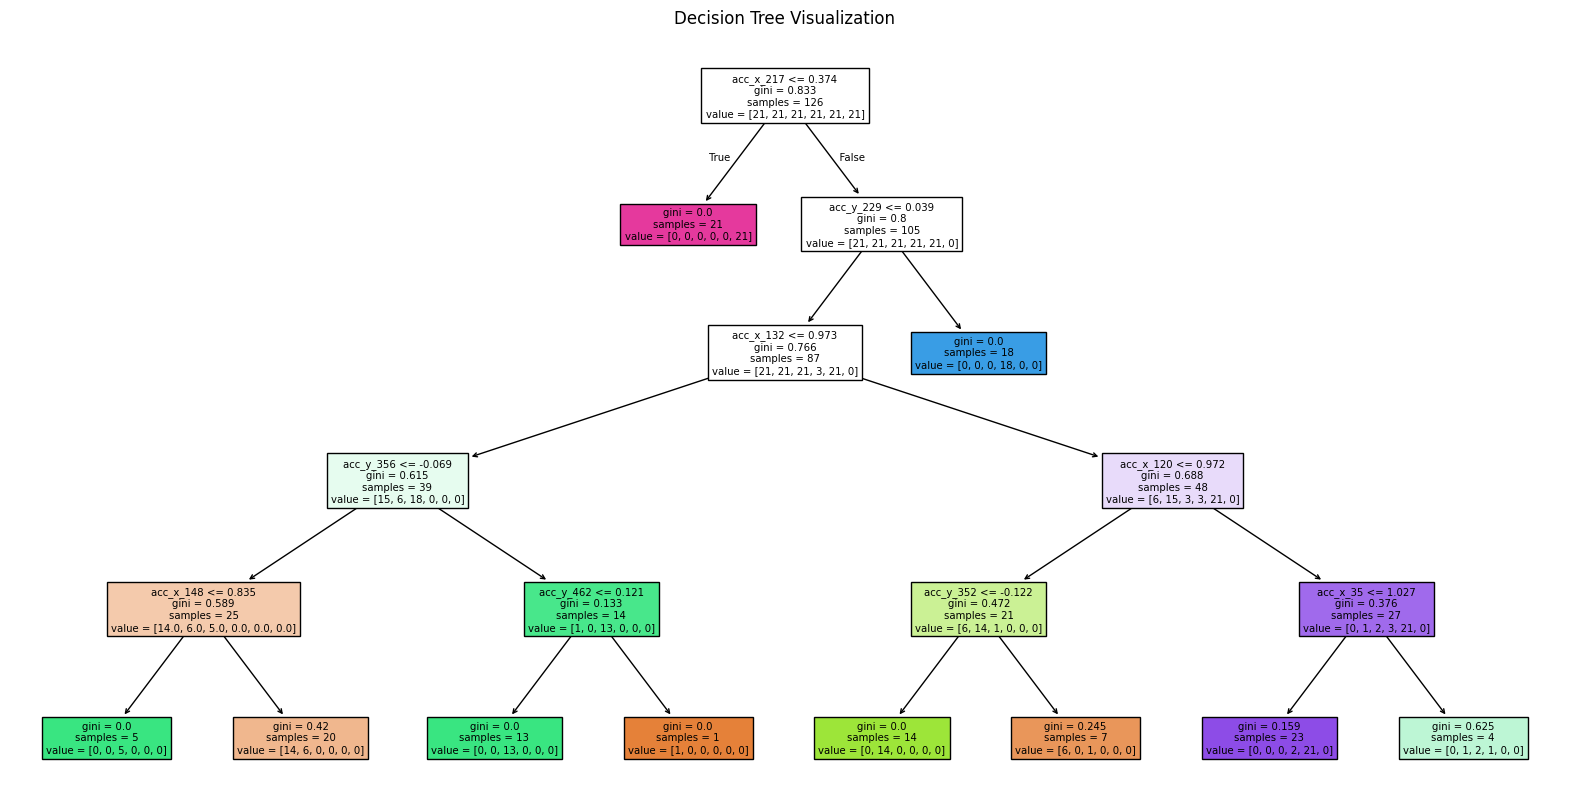

Accuracy: 0.2083
Recall: 0.2083
Precision: 0.1833

Confusion Matrix:

   1  2  3  4  5  6
1  1  0  3  0  0  0
2  1  0  2  0  1  0
3  2  1  0  1  0  0
4  2  0  2  0  0  0
5  4  0  0  0  0  0
6  0  0  0  0  0  4



In [7]:
decision_tree_raw(reshaped_array,X_train,y_label,Y_train,5)
print()

Decision Tree using TSFEL

In [8]:
cfg = tsfel.get_features_by_domain()
feature_df = tsfel.time_series_features_extractor(cfg, X_train, verbose = 0, fs = 50)
feature_df_test = tsfel.time_series_features_extractor(cfg, reshaped_array, verbose = 0, fs = 50)

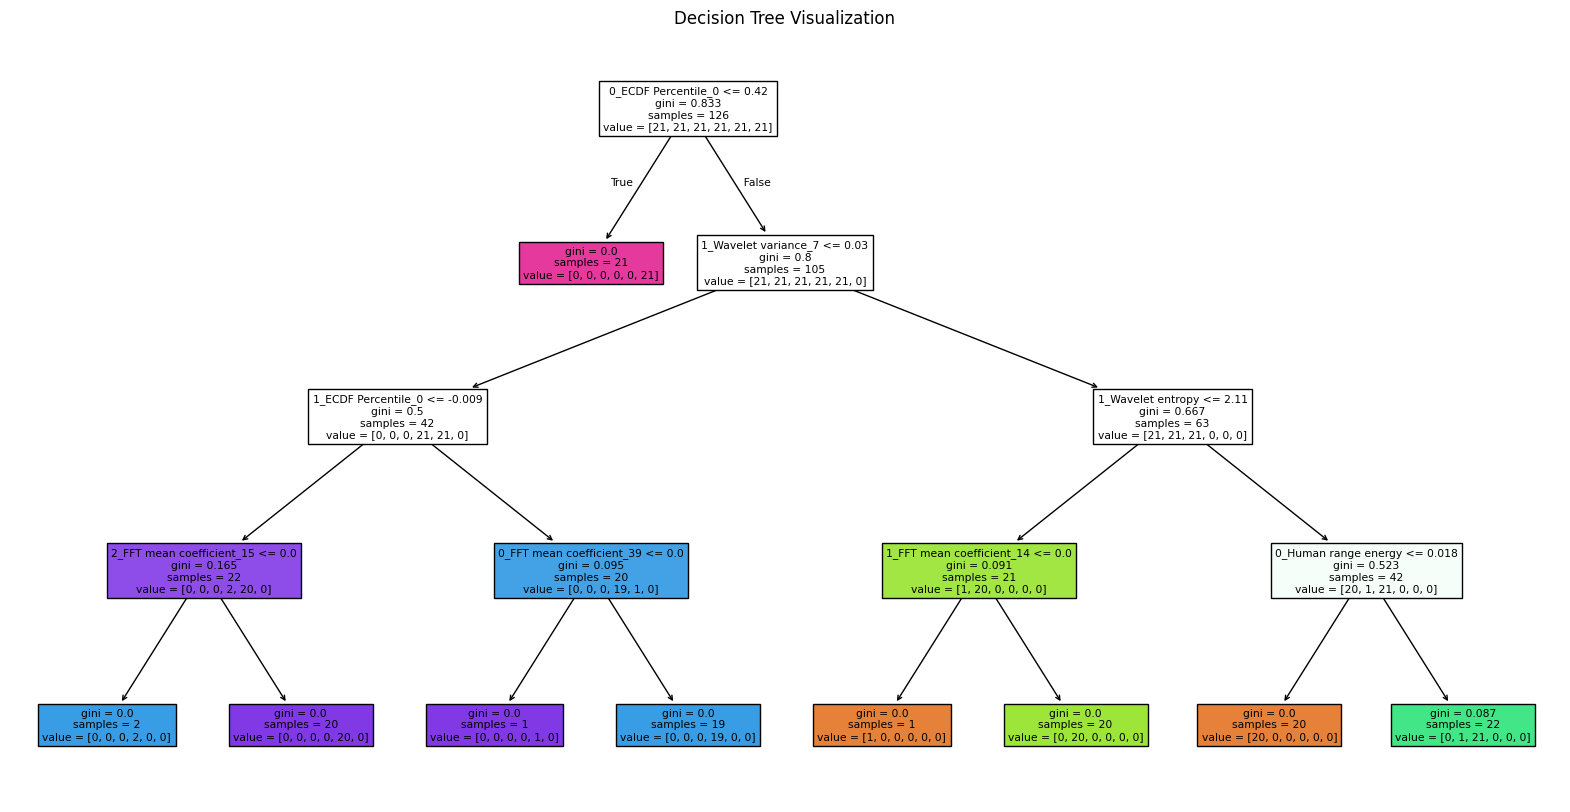

Accuracy: 0.7083
Recall: 0.7083
Precision: 0.7861

Confusion Matrix:

   1  2  3  4  5  6
1  4  0  0  0  0  0
2  1  2  1  0  0  0
3  0  1  3  0  0  0
4  0  0  0  0  4  0
5  0  0  0  0  4  0
6  0  0  0  0  0  4



In [9]:
decision_tree_TSFEL(feature_df,feature_df_test,Y_train,y_label,depth = 4)
print()

The Model Performs very well on the TSFEL decision tree, giving us an accuracy of 0.7083, indicating that the features such as variance, mean and other statistical, spectral and fractal functions are very similar to the ones extracted form the UCI HAR dataset that the decision tree model is trained on. 

We see that the accuracy on raw accelerometer data is very low (about 0.2083). This is beacause we dont have any distinguishable features to split upon as it is a time series.

$\bold{Question\ 2}$

In this Question, we have decided to leave one out testing, as in out of four subjects, the model is trained on the data of 3 subjects and the model is made to predicton the data of the fourth subject. The training data sued is the different activity data of subject 1,2, and 3 (Aarsh, Abhinav and Arjun) and made to predict on the data of Subject 4 (Hari). The decision trees are made usnig raw data and TSFEL

In [19]:
test_set = reshaped_array[::4]
train_set = np.delete(reshaped_array, np.arange(0, len(reshaped_array), 4), axis=0)
test_labels = y_label[::4]
train_labels = [y_label[i] for i in range(len(y_label)) if i % 4 != 0]

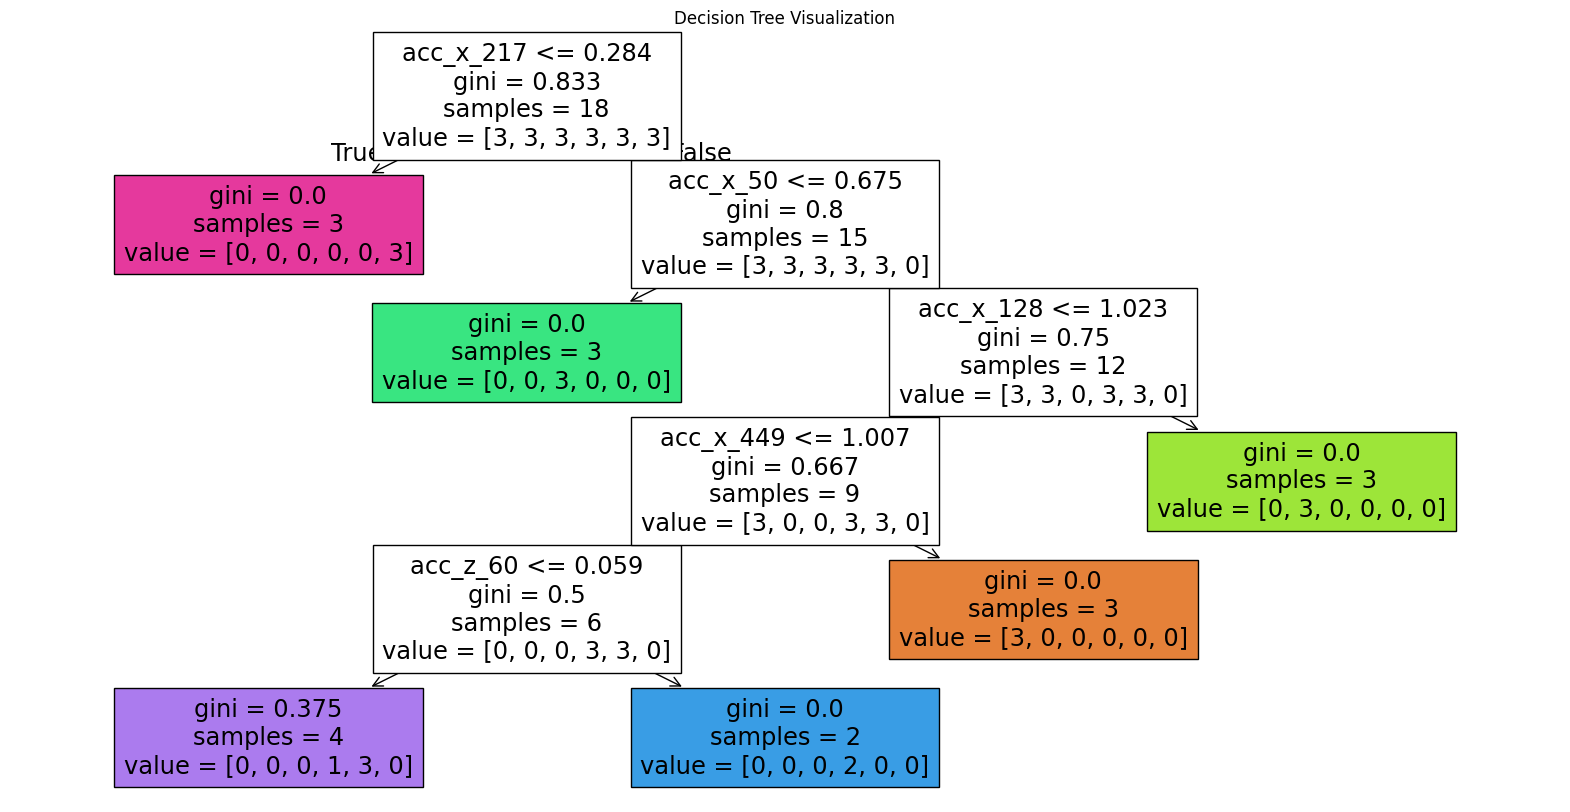

Accuracy: 0.6667
Recall: 0.6667
Precision: 0.8889

Confusion Matrix:

   1  2  3  4  5  6
1  0  0  1  0  0  0
2  0  0  1  0  0  0
3  0  0  1  0  0  0
4  0  0  0  1  0  0
5  0  0  0  0  1  0
6  0  0  0  0  0  1



In [20]:
decision_tree_raw(test_set,train_set,test_labels,train_labels,depth = 5)
print()

In [21]:
cfg = tsfel.get_features_by_domain()
feature_df = tsfel.time_series_features_extractor(cfg, train_set, verbose = 0, fs = 50)
feature_df_test = tsfel.time_series_features_extractor(cfg, test_set, verbose = 0, fs = 50)

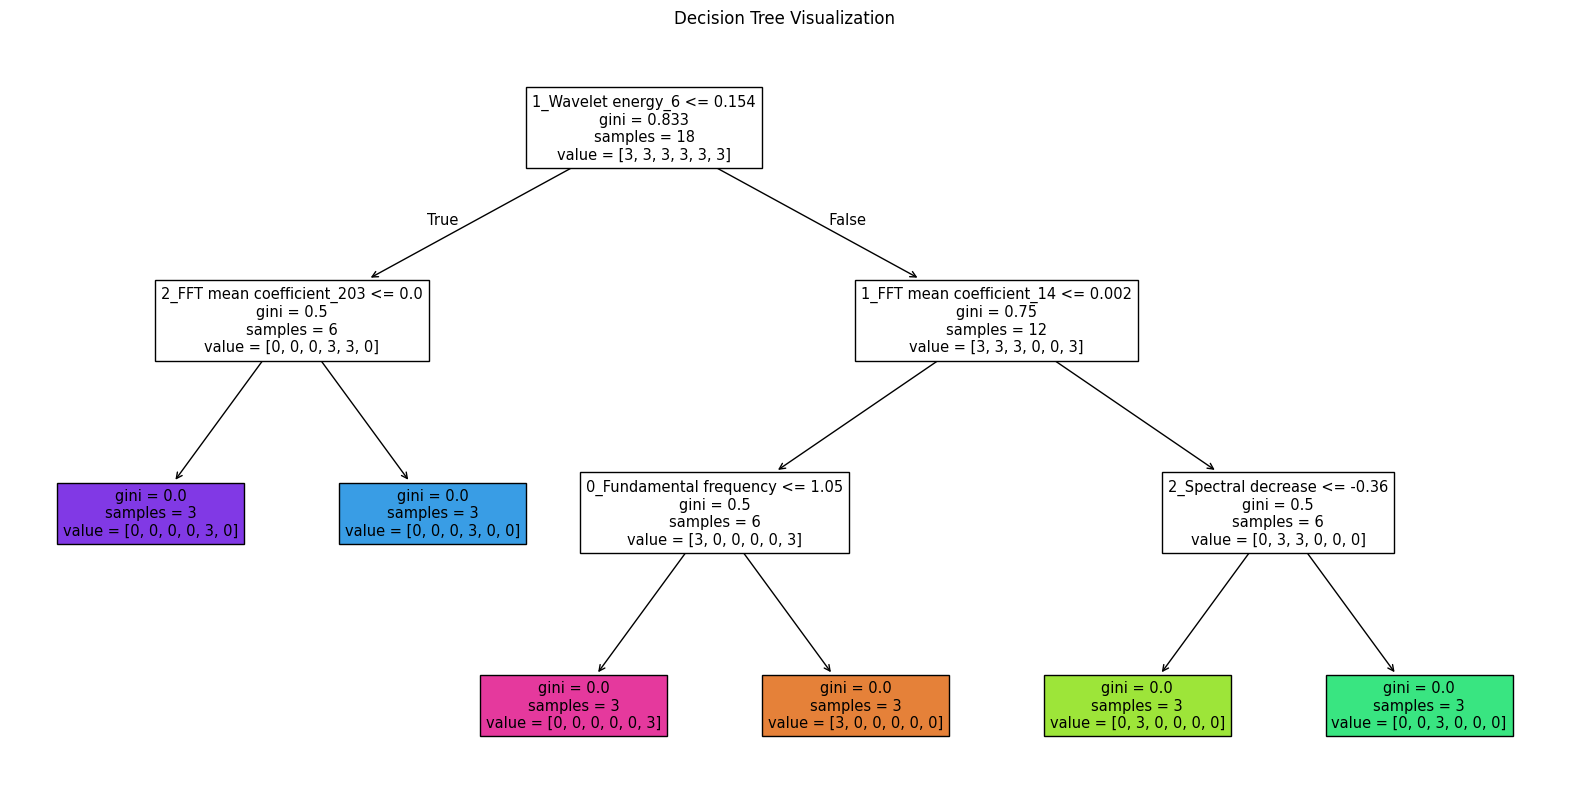

Accuracy: 0.5000
Recall: 0.5000
Precision: 0.5833

Confusion Matrix:

   1  2  3  4  5  6
1  1  0  0  0  0  0
2  0  0  0  0  0  1
3  0  1  0  0  0  0
4  0  0  0  1  0  0
5  0  0  0  0  1  0
6  0  0  0  0  1  0



In [15]:
decision_tree_TSFEL(feature_df,feature_df_test,train_labels,test_labels,depth = 4)
print()

Looking at the above, we can see that Raw data decision tree is giving good accuracy. This maybe due to the fact that we have similae walking styles and filmed in the same environment, leading to similar features.

The accuracy on TSFEL data is fairly decent at 0.5 accuracy. The reason for lower accuracy may be due to the limitation of the size of the dataset, leading it have bias.
